In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycoprops, graycomatrix
from skimage.measure import shannon_entropy

In [4]:
print(os.listdir(r"/mnt/d/final_dataset"))


['test', 'train']


In [5]:
#Start by creating empty lists.
train_images = []
train_labels = [] 

In [6]:
for directory_path in glob.glob(r"/mnt/d/final_dataset/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (300, 300)) #Resize images
        train_images.append(img)
        train_labels.append(label)

akiec
bcc
bkl
df
mel
nv
vasc


In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [8]:
print(train_images)
print(train_labels)

[[[146 146 146 ... 163 167 170]
  [146 147 148 ... 160 164 167]
  [146 148 148 ... 160 162 165]
  ...
  [129 128 128 ... 140 140 140]
  [127 127 126 ... 140 140 140]
  [127 126 125 ... 141 140 138]]

 [[108 111 113 ... 159 158 157]
  [104 111 114 ... 159 156 155]
  [ 98 112 117 ... 156 154 152]
  ...
  [136 139 145 ... 161 162 163]
  [137 140 145 ... 161 162 164]
  [139 143 146 ... 160 161 160]]

 [[179 180 180 ... 191 191 192]
  [180 179 180 ... 191 193 192]
  [180 178 179 ... 191 190 189]
  ...
  [183 185 185 ... 186 188 188]
  [184 186 186 ... 185 186 189]
  [184 185 186 ... 184 187 188]]

 ...

 [[157 157 159 ... 172 172 172]
  [157 158 158 ... 173 173 172]
  [157 158 159 ... 172 172 172]
  ...
  [158 159 159 ... 174 174 174]
  [159 161 160 ... 173 175 174]
  [162 161 161 ... 174 175 174]]

 [[184 183 187 ... 198 199 201]
  [184 186 187 ... 198 200 200]
  [184 186 186 ... 197 197 198]
  ...
  [190 192 192 ... 182 180 181]
  [188 192 193 ... 183 184 186]
  [188 193 195 ... 183 186 1

In [9]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []

In [10]:
for directory_path in glob.glob(r"/mnt/d/final_dataset/test/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (300, 300))
        test_images.append(img)
        test_labels.append(label)

akiec
bcc
bkl
df
mel
nv
vasc


In [11]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [12]:
print(test_images)
print(test_labels)

[[[146 146 146 ... 163 167 170]
  [146 147 148 ... 160 164 167]
  [146 148 148 ... 160 162 165]
  ...
  [129 128 128 ... 140 140 140]
  [127 127 126 ... 140 140 140]
  [127 126 125 ... 141 140 138]]

 [[108 111 113 ... 159 158 157]
  [104 111 114 ... 159 156 155]
  [ 98 112 117 ... 156 154 152]
  ...
  [136 139 145 ... 161 162 163]
  [137 140 145 ... 161 162 164]
  [139 143 146 ... 160 161 160]]

 [[179 180 180 ... 191 191 192]
  [180 179 180 ... 191 193 192]
  [180 178 179 ... 191 190 189]
  ...
  [183 185 185 ... 186 188 188]
  [184 186 186 ... 185 186 189]
  [184 185 186 ... 184 187 188]]

 ...

 [[170 172 173 ... 172 172 170]
  [171 170 171 ... 171 172 171]
  [172 172 168 ... 167 170 168]
  ...
  [168 170 171 ... 152 148 148]
  [169 169 168 ... 150 149 148]
  [171 171 170 ... 146 147 145]]

 [[ 42  45  52 ...  80  76  71]
  [ 42  47  55 ...  82  77  74]
  [ 45  49  55 ...  84  79  75]
  ...
  [ 38  38  38 ...  22  21  21]
  [ 37  38  38 ...  21  21  21]
  [ 39  37  39 ...  21  21  

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [14]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [15]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()
        
        img = dataset[image, :,:]
  
                
        GLCM = graycomatrix(img, [0], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = graycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = graycomatrix(img, [1], [0])       
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = graycomatrix(img, [1], [np.pi/4])       
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5

        GLCM6 = graycomatrix(img, [1], [np.pi/2])       
        GLCM_Energy6 = graycoprops(GLCM6, 'energy')[0]
        df['Energy6'] = GLCM_Energy6
        GLCM_corr6 = graycoprops(GLCM6, 'correlation')[0]
        df['Corr6'] = GLCM_corr6       
        GLCM_diss6 = graycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim6'] = GLCM_diss6       
        GLCM_hom6 = graycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen6'] = GLCM_hom6       
        GLCM_contr6 = graycoprops(GLCM6, 'contrast')[0]
        df['Contrast6'] = GLCM_contr6

        GLCM7 = graycomatrix(img, [2], [0])       
        GLCM_Energy7 = graycoprops(GLCM7, 'energy')[0]
        df['Energy7'] = GLCM_Energy7
        GLCM_corr7 = graycoprops(GLCM7, 'correlation')[0]
        df['Corr7'] = GLCM_corr7       
        GLCM_diss7 = graycoprops(GLCM7, 'dissimilarity')[0]
        df['Diss_sim7'] = GLCM_diss7       
        GLCM_hom7 = graycoprops(GLCM7, 'homogeneity')[0]
        df['Homogen7'] = GLCM_hom7       
        GLCM_contr7 = graycoprops(GLCM7, 'contrast')[0]
        df['Contrast7'] = GLCM_contr7

        GLCM8 = graycomatrix(img, [2], [np.pi/4])       
        GLCM_Energy8 = graycoprops(GLCM8, 'energy')[0]
        df['Energy8'] = GLCM_Energy8
        GLCM_corr8 = graycoprops(GLCM8, 'correlation')[0]
        df['Corr8'] = GLCM_corr8       
        GLCM_diss8 = graycoprops(GLCM8, 'dissimilarity')[0]
        df['Diss_sim8'] = GLCM_diss8       
        GLCM_hom8 = graycoprops(GLCM8, 'homogeneity')[0]
        df['Homogen8'] = GLCM_hom8       
        GLCM_contr8 = graycoprops(GLCM8, 'contrast')[0]
        df['Contrast8'] = GLCM_contr8

        GLCM9 = graycomatrix(img, [2], [np.pi/2])       
        GLCM_Energy9 = graycoprops(GLCM9, 'energy')[0]
        df['Energy9'] = GLCM_Energy9
        GLCM_corr9 = graycoprops(GLCM9, 'correlation')[0]
        df['Corr9'] = GLCM_corr9       
        GLCM_diss9 = graycoprops(GLCM9, 'dissimilarity')[0]
        df['Diss_sim9'] = GLCM_diss9       
        GLCM_hom9 = graycoprops(GLCM9, 'homogeneity')[0]
        df['Homogen9'] = GLCM_hom9       
        GLCM_contr9 = graycoprops(GLCM9, 'contrast')[0]
        df['Contrast9'] = GLCM_contr9
        
        GLCM10 = graycomatrix(img, [3], [0])       
        GLCM_Energy10 = graycoprops(GLCM10, 'energy')[0]
        df['Energy10'] = GLCM_Energy10
        GLCM_corr10 = graycoprops(GLCM10, 'correlation')[0]
        df['Corr10'] = GLCM_corr10       
        GLCM_diss10 = graycoprops(GLCM10, 'dissimilarity')[0]
        df['Diss_sim10'] = GLCM_diss10       
        GLCM_hom10 = graycoprops(GLCM10, 'homogeneity')[0]
        df['Homogen10'] = GLCM_hom10       
        GLCM_contr10 = graycoprops(GLCM10, 'contrast')[0]
        df['Contrast10'] = GLCM_contr10
        
        GLCM11 = graycomatrix(img, [3], [np.pi/4])       
        GLCM_Energy11 = graycoprops(GLCM11, 'energy')[0]
        df['Energy11'] = GLCM_Energy11
        GLCM_corr11 = graycoprops(GLCM11, 'correlation')[0]
        df['Corr11'] = GLCM_corr11       
        GLCM_diss11 = graycoprops(GLCM11, 'dissimilarity')[0]
        df['Diss_sim11'] = GLCM_diss11       
        GLCM_hom11 = graycoprops(GLCM11, 'homogeneity')[0]
        df['Homogen11'] = GLCM_hom11       
        GLCM_contr11 = graycoprops(GLCM11, 'contrast')[0]
        df['Contrast11'] = GLCM_contr11

        GLCM12 = graycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy12 = graycoprops(GLCM12, 'energy')[0]
        df['Energy12'] = GLCM_Energy12
        GLCM_corr12 = graycoprops(GLCM12, 'correlation')[0]
        df['Corr12'] = GLCM_corr12       
        GLCM_diss12 = graycoprops(GLCM12, 'dissimilarity')[0]
        df['Diss_sim12'] = GLCM_diss12       
        GLCM_hom12 = graycoprops(GLCM12, 'homogeneity')[0]
        df['Homogen12'] = GLCM_hom12       
        GLCM_contr12 = graycoprops(GLCM12, 'contrast')[0]
        df['Contrast12'] = GLCM_contr12

        GLCM13 = graycomatrix(img, [4], [0])       
        GLCM_Energy13 = graycoprops(GLCM13, 'energy')[0]
        df['Energy13'] = GLCM_Energy13
        GLCM_corr13 = graycoprops(GLCM13, 'correlation')[0]
        df['Corr13'] = GLCM_corr13       
        GLCM_diss13 = graycoprops(GLCM13, 'dissimilarity')[0]
        df['Diss_sim13'] = GLCM_diss13       
        GLCM_hom13 = graycoprops(GLCM13, 'homogeneity')[0]
        df['Homogen13'] = GLCM_hom13       
        GLCM_contr13 = graycoprops(GLCM13, 'contrast')[0]
        df['Contrast13'] = GLCM_contr13

        GLCM14 = graycomatrix(img, [4], [np.pi/4])       
        GLCM_Energy14 = graycoprops(GLCM14, 'energy')[0]
        df['Energy14'] = GLCM_Energy14
        GLCM_corr14 = graycoprops(GLCM14, 'correlation')[0]
        df['Corr14'] = GLCM_corr14       
        GLCM_diss14 = graycoprops(GLCM14, 'dissimilarity')[0]
        df['Diss_sim14'] = GLCM_diss14       
        GLCM_hom14 = graycoprops(GLCM14, 'homogeneity')[0]
        df['Homogen14'] = GLCM_hom14       
        GLCM_contr14 = graycoprops(GLCM14, 'contrast')[0]
        df['Contrast14'] = GLCM_contr14

        GLCM15 = graycomatrix(img, [4], [np.pi/2])       
        GLCM_Energy15 = graycoprops(GLCM15, 'energy')[0]
        df['Energy15'] = GLCM_Energy15
        GLCM_corr15 = graycoprops(GLCM15, 'correlation')[0]
        df['Corr15'] = GLCM_corr15       
        GLCM_diss15 = graycoprops(GLCM15, 'dissimilarity')[0]
        df['Diss_sim15'] = GLCM_diss15       
        GLCM_hom15 = graycoprops(GLCM15, 'homogeneity')[0]
        df['Homogen15'] = GLCM_hom15       
        GLCM_contr15 = graycoprops(GLCM15, 'contrast')[0]
        df['Contrast15'] = GLCM_contr15

        GLCM16 = graycomatrix(img, [5], [0])       
        GLCM_Energy16 = graycoprops(GLCM16, 'energy')[0]
        df['Energy16'] = GLCM_Energy16
        GLCM_corr16 = graycoprops(GLCM16, 'correlation')[0]
        df['Corr16'] = GLCM_corr16       
        GLCM_diss16 = graycoprops(GLCM16, 'dissimilarity')[0]
        df['Diss_sim16'] = GLCM_diss16       
        GLCM_hom16 = graycoprops(GLCM16, 'homogeneity')[0]
        df['Homogen16'] = GLCM_hom16       
        GLCM_contr16 = graycoprops(GLCM16, 'contrast')[0]
        df['Contrast16'] = GLCM_contr16

        GLCM17 = graycomatrix(img, [5], [np.pi/4])       
        GLCM_Energy17 = graycoprops(GLCM17, 'energy')[0]
        df['Energy17'] = GLCM_Energy17
        GLCM_corr17 = graycoprops(GLCM17, 'correlation')[0]
        df['Corr17'] = GLCM_corr17       
        GLCM_diss17 = graycoprops(GLCM17, 'dissimilarity')[0]
        df['Diss_sim17'] = GLCM_diss17       
        GLCM_hom17 = graycoprops(GLCM17, 'homogeneity')[0]
        df['Homogen17'] = GLCM_hom17       
        GLCM_contr17 = graycoprops(GLCM17, 'contrast')[0]
        df['Contrast17'] = GLCM_contr17

        GLCM18 = graycomatrix(img, [5], [np.pi/2])       
        GLCM_Energy18 = graycoprops(GLCM18, 'energy')[0]
        df['Energy18'] = GLCM_Energy18
        GLCM_corr18 = graycoprops(GLCM18, 'correlation')[0]
        df['Corr18'] = GLCM_corr18       
        GLCM_diss18 = graycoprops(GLCM18, 'dissimilarity')[0]
        df['Diss_sim18'] = GLCM_diss18       
        GLCM_hom18 = graycoprops(GLCM18, 'homogeneity')[0]
        df['Homogen18'] = GLCM_hom18       
        GLCM_contr18 = graycoprops(GLCM18, 'contrast')[0]
        df['Contrast18'] = GLCM_contr18

        GLCM19 = graycomatrix(img, [6], [0])       
        GLCM_Energy19 = graycoprops(GLCM19, 'energy')[0]
        df['Energy19'] = GLCM_Energy19
        GLCM_corr19 = graycoprops(GLCM19, 'correlation')[0]
        df['Corr19'] = GLCM_corr19       
        GLCM_diss19 = graycoprops(GLCM19, 'dissimilarity')[0]
        df['Diss_sim19'] = GLCM_diss19       
        GLCM_hom19 = graycoprops(GLCM19, 'homogeneity')[0]
        df['Homogen19'] = GLCM_hom19       
        GLCM_contr19 = graycoprops(GLCM19, 'contrast')[0]
        df['Contrast19'] = GLCM_contr19

        GLCM20 = graycomatrix(img, [6], [np.pi/4])       
        GLCM_Energy20 = graycoprops(GLCM20, 'energy')[0]
        df['Energy20'] = GLCM_Energy20
        GLCM_corr20 = graycoprops(GLCM20, 'correlation')[0]
        df['Corr20'] = GLCM_corr20       
        GLCM_diss20 = graycoprops(GLCM20, 'dissimilarity')[0]
        df['Diss_sim20'] = GLCM_diss20       
        GLCM_hom20 = graycoprops(GLCM20, 'homogeneity')[0]
        df['Homogen20'] = GLCM_hom20       
        GLCM_contr20 = graycoprops(GLCM20, 'contrast')[0]
        df['Contrast20'] = GLCM_contr20
        
        #Add more filters as needed
        # entropy = shannon_entropy(img)
        # # newframe = entropy.copy()
        # df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = pd.concat([image_dataset, df])
        
    return image_dataset

In [16]:
image_features = feature_extractor(x_train)
X_for_ML = image_features

In [27]:
print(image_features.shape)

10015
(10015, 100)


In [17]:
import lightgbm as lgb

d_train = lgb.Dataset(X_for_ML, label=y_train)
d_train

In [18]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':100,
              'max_depth':10,
              'num_class':7}  #no.of unique values in the target class not inclusive of the end value

In [19]:
lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 10015, number of used features: 88
[LightGBM] [Info] Start training from score -3.421879
[LightGBM] [Info] Start training from score -2.969616
[LightGBM] [Info] Start training from score -2.209683
[LightGBM] [Info] Start training from score -4.466907
[LightGBM] [Info] Start training from score -2.197025
[LightGBM] [Info] Start training from score -0.401230
[LightGBM] [Info] Start training from score -4.256012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [20]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction = np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

Accuracy =  0.9345981028457314
Classification report
               precision    recall  f1-score   support

       akiec       0.98      1.00      0.99        65
         bcc       0.99      0.87      0.93       103
         bkl       0.95      0.75      0.84       220
          df       1.00      1.00      1.00        23
         mel       0.98      0.74      0.84       223
          nv       0.92      1.00      0.96      1341
        vasc       1.00      0.96      0.98        28

    accuracy                           0.93      2003
   macro avg       0.97      0.90      0.94      2003
weighted avg       0.94      0.93      0.93      2003

F1 Score =  0.9317390720825266
Jaccard Score =  0.8758215006163106
Precision recall fscore support (array([0.98484848, 0.98901099, 0.95402299, 1.        , 0.97647059,
       0.91942149, 1.        ]), array([1.        , 0.87378641, 0.75454545, 1.        , 0.74439462,
       0.99552573, 0.96428571]), array([0.99236641, 0.92783505, 0.84263959, 1.    

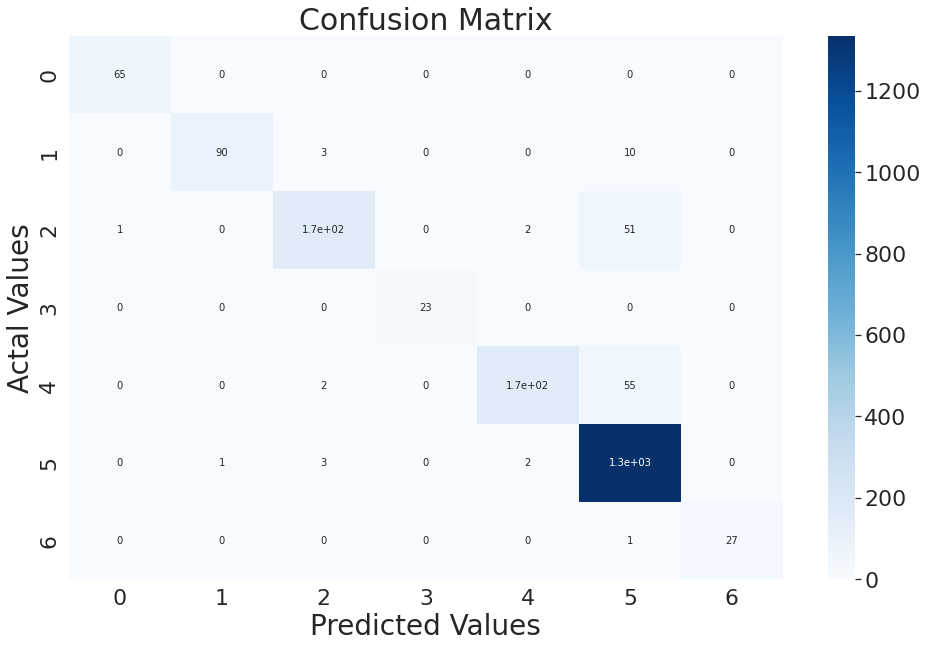

In [21]:
#Print overall accuracy
from sklearn import metrics
import seaborn as sns

print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))
print ("Classification report\n", metrics.classification_report(test_labels, test_prediction))
# print ("Precision score = ", metrics.precision_score(test_labels, test_prediction))
# print("ROC AUC = ", metrics.roc_auc_score(test_labels, test_prediction, multi_class="ovr"))
print("F1 Score = ", metrics.f1_score(test_labels, test_prediction, average="weighted"))
print("Jaccard Score = ", metrics.jaccard_score(test_labels, test_prediction, average='weighted'))
print("Precision recall fscore support", metrics.precision_recall_fscore_support(test_labels, test_prediction, 
                                                                                labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']))
cf_matrix = metrics.confusion_matrix(test_labels, test_prediction)

sns.set(font_scale=2)
plt.figure(figsize=(16, 10))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix', fontsize=30)
plt.ylabel('Actal Values', fontsize=28)
plt.xlabel('Predicted Values', fontsize=28)
plt.show()

<AxesSubplot:>

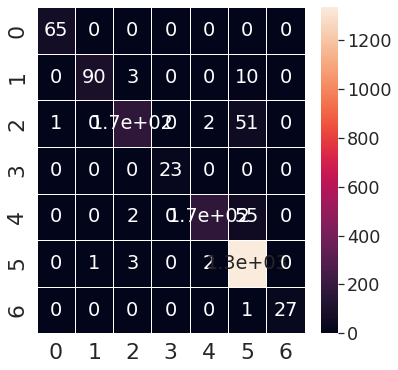

In [22]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

The prediction for this image is:  ['nv']
The actual label for this image is:  nv


/home/karan/.virtualenvs/skin-lesion/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


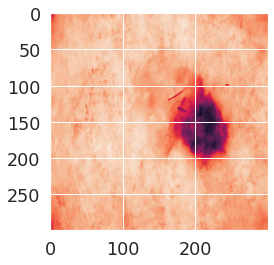

In [23]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])